## Adult Dataset :
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics).

In this Dataset we have 48842 observation and 15 attributes including target attribute(income).
Where it have Categorical and numeric variabels in attribute.
Attributes with numeric values are 'age','fnlwgt', 'educational-num', 'capital-gain', 'capital-loss' and 'hours-per-week'.
Attributes with categorical values are 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender' and 'income'.

## Attribute Information :

age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
income: >50K, <=50K

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Loading data :

In [5]:
missing_val = '?'
df = pd.read_csv('adult.csv',na_values = missing_val)

#So, we can clearly see that missing values are present in the form of "?" in "workclass","occupation", "native-country" so we are replacing it with NaN (not a null) for identifying them as missing value for further analysis.


## Data preprocessing 

In [6]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


**We printed first and last 5 rows from our dataset using the pandas functions head() and tail().**

In [8]:
df.shape

(48842, 15)

In [9]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,48842,NaN,NaN,NaN,38.6436,13.7105,17,28,37,48,90
workclass,46043,8,Private,33906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,48842,NaN,NaN,NaN,189664,105604,12285,117550,178144,237642,1.4904e+06
education,48842,16,HS-grad,15784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
educational-num,48842,NaN,NaN,NaN,10.0781,2.57097,1,9,10,12,16
marital-status,48842,7,Married-civ-spouse,22379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,46033,14,Prof-specialty,6172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,48842,6,Husband,19716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,48842,5,White,41762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,48842,2,Male,32650,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## A. Observation for numeric attribute :

In this data of attributes 'age','educational-num','capital-gain','capital-loss' and 'hours-per-week' is continuous.

**Age :-**

This attribute has Age of an individual.
The mean value is 38. Age is having the standerd deviation 13.71.
The value of Age attribute varies from 17 to 90.

**Educational-num :-**

This attribute has Individual's year of receiving education.
The mean value is 10 and median is 10.

**Capital-gain :-**

For capital-gain, the mean is 1101.43 and median is 0, which indicates that the distribution is highly right skewed.
In the attribute capital-gain shows that either a person has no gain/profit or has gain of very large amount.

**Capital-loss :-**

This attribute is similar to the capital-gain i.e. either a person has no loss or has loss with very large amount.
The Mean is 88 but median is 0.

**Hours-per-week :-**

This attribute means number of working hours spend by an individual in a week.
This data the hours-per-week atrribute varies within the range of 1 to 99.

## B. Observation for categorical attribute :

In this the data of attributes 'workclass','education','marital-status','occupation','relationship','race','gender','native-country' is categorical.

**Workclass :-**

In this attributes shows the Individual work category.
The top category in workclass is 'Private' and the Frequency of 'Private' is 33307.
There are 7 unique categories present in the workclass attribute.

**Education :-**

The attribute 'education' shows the Individual's highest education degree.
The top category in education is 'HS-grad' and the Frequency of 'HS-grad' is 14783.
There are 16 unique categories present in the workclass attribute.

**Marital-status :-**

The attribute 'marital-status' shows the Individual marital status.
The top category in marital-status is 'Married-civ-spouse' and the Frequency of 'Married-civ-spouse' is 21055.
There are 7 unique categories present in the marital-status attribute.

**Occupation :-**

The attribute 'occupation' shows the Individual's occupation.
The top category in occupation is 'Craft-repair' and the Frequency of 'Craft-repair' is 6020.
There are 17 unique categories present in the occupation attribute.

**Relationship :-**

The attribute 'relationship' shows the Individual's relation in a family.
The top category in relationship is 'Husband' and the Frequency of 'Husband' is 18666.
There are 6 unique categories present in the relationship attribute.

**Race :-**

The attribute 'race' shows the Race of Individual.
The top category in race is 'White' and the Frequency of 'White' is 38903.
There are 5 unique categories present in the race attribute.

**Gender :-**

The top category in gender is 'Male' and the Frequency of 'Male' is 30527.
There are 2 unique categories present in the gender attribute.

Native-country :-

The attribute 'native-country' shows the Individual's native country.
The top category in native-country is 'United-States' and the Frequency of 'United-States' is 41292.
There are 41 unique categories present in the native-country attribute.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [11]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

**Observation :-**

1. In above we can say there are 3 columns contain missing values i.e., 'workclass', 'occupation', 'native-country'.
2. All the data containing missing value have the datatype as 'object'.
3. Mostly 'workclass' and 'occupation' contain missing value.
4. In above we can say that in 'workclass' there are 2799 missing values followed by 'occupation' having missing values 2809 and 'native-country' having missing values 857.

In [12]:
df.dropna(inplace = True)

**Using this function from pandas we are removing all the missing values by removing the rows where missing values occurs.**

In [15]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

**No missing values were found in above dataset.**

In [16]:
df.drop('fnlwgt',axis=1,inplace=True)
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


**Removing some useless cloumn from above dataset**

## Encoding categorical features:

In [17]:
cat = df.select_dtypes(include=['object'])

In [18]:
cat

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [19]:
encoder = OneHotEncoder(drop='first', sparse=False)
cat_df = pd.DataFrame(encoder.fit_transform(cat), 
                      columns=encoder.get_feature_names(cat.columns))

In [20]:
cat_df

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45218,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
45219,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45220,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Standardizing numerical data:

In [21]:
num = df.select_dtypes(include=['int64'])

In [22]:
num

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
5,34,6,0,0,30
...,...,...,...,...,...
48837,27,12,0,0,38
48838,40,9,0,0,40
48839,58,9,0,0,40
48840,22,9,0,0,20


**By using this feature removing the mean and scaling to unit variance**

In [23]:
scaler = StandardScaler()
num_df = pd.DataFrame(scaler.fit_transform(num), 
                      columns = num.columns)

In [24]:
num_df.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942


In [25]:
new_df = pd.concat([num_df, cat_df], axis=1)

**Using this function we are concatenating both the dataframe using Pandas function concat().**

In [26]:
new_df

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,-0.873671,0.737034,-0.146733,-0.21878,-0.244684,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45218,0.109857,-0.438122,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
45219,1.471665,-0.438122,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45220,-1.251951,-0.438122,-0.146733,-0.21878,-1.743763,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Train Test Split :

In [27]:
# X = new_df.drop('income_>50K',axis=1)
Y = new_df.pop('income_>50K')
X = new_df

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.30,random_state=25)

1. Here we are taking 70% of data for training and 30% data for testing.
2. Random_state just fix the randomness of data state which will not change.

**Train the model on Training Data :**

In [29]:
lr = LogisticRegression( max_iter=250)
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Prediction on Test Data:

In [30]:
y_predict = lr.predict(X_test)
y_predict

array([1., 1., 0., ..., 0., 0., 0.])

## Model evaluation :

In [31]:
# Accuracy classification score.
accuracy_score(y_test, y_predict)

0.8497825606250461

In [32]:
confusion_matrix(y_test, y_predict)

array([[9475,  685],
       [1353, 2054]], dtype=int64)

In [33]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     10160
         1.0       0.75      0.60      0.67      3407

    accuracy                           0.85     13567
   macro avg       0.81      0.77      0.79     13567
weighted avg       0.84      0.85      0.84     13567



**A Classification report is used to measure the quality of predictions from a classification algorithm.**

## Using RFE to extract the best features and applying Logistic Regression on best features:

In [36]:
from sklearn.feature_selection import RFE
lr_temp = LogisticRegression( max_iter=250)
## No. of features taking = 30
rfe = RFE(lr_temp, 30)
rfe = rfe.fit(X_train, y_train)
rfe

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=250,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=30, step=1, verbose=0)

In [37]:
temp_df = pd.DataFrame({'Columns' : X_train.columns, 'Included' : rfe.support_, 'Ranking' : rfe.ranking_})
temp_df

,Columns,Included,Ranking
0,age,False,11
1,educational-num,True,1
2,capital-gain,True,1
3,capital-loss,False,37
4,hours-per-week,False,12
...,...,...,...
90,native-country_Thailand,False,35
91,native-country_Trinadad&Tobago,False,49
92,native-country_United-States,False,32
93,native-country_Vietnam,True,1


In [38]:
imp_col = X_train.columns[rfe.support_]
imp_col

Index(['educational-num', 'capital-gain', 'workclass_Without-pay',
       'education_1st-4th', 'education_5th-6th', 'education_Prof-school',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Wife', 'gender_Male',
       'native-country_Columbia', 'native-country_Dominican-Republic',
       'native-country_Ecuador', 'native-country_El-Salvador',
       'native-country_India', 'native-country_Laos', 'native-country_Mexico',
       'native-country_Nicaragua', 'native-country_Outlying-US(Guam-USVI-etc)',
       'native-country_Peru', 'native-country_Scotland',
       'native-country_South', 'native-country_Vietnam'],
      dtype='object')

In [39]:
X_train_new = X_train[imp_col]
X_train_new

,educational-num,capital-gain,workclass_Without-pay,education_1st-4th,education_5th-6th,education_Prof-school,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,occupation_Exec-managerial,occupation_Farming-fishing,...,native-country_El-Salvador,native-country_India,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Scotland,native-country_South,native-country_Vietnam
21220,-1.613277,-0.146733,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8492,1.128753,-0.146733,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22673,-0.046403,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
755,1.128753,0.166868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34307,-0.438122,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35702,-0.046403,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26767,-0.046403,-0.146733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6618,1.912190,-0.146733,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24894,1.128753,-0.146733,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Applying the best feature we will Train the model on Training Data**

In [40]:
lrn = LogisticRegression(max_iter=250)
lrn.fit(X_train_new, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=250,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predicting the Model

In [41]:
y_predict_new = lrn.predict(X_train_new)
y_predict_new

array([0., 1., 0., ..., 0., 1., 0.])

In [42]:
accuracy_score(y_test, y_predict)

0.8497825606250461

**84.97% of accuracy.**

##  Using PCA to extract the best features :-

1. PCA is a method used to reduce number of variables in the data by extracting important one from a large data. It reduces the dimension of the data with the aim of retaining as much information as possible.
2. n_components : Number of components to keep.
3. whiten : Whitening will remove some information from the transformed signal.
4. Explained_variance_ratio : Percentage of variance explained by each of the selected components. If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.
5. np.cumsum : Return the cumulative sum of the elements along a given axis.

In [43]:
pca = PCA(whiten=True)
pca.fit(X)
np.cumsum(pca.explained_variance_ratio_)

array([0.17231214, 0.29928058, 0.41859915, 0.52288518, 0.62121152,
       0.66781356, 0.69754836, 0.72354624, 0.74943991, 0.77017519,
       0.78875128, 0.80669662, 0.8222957 , 0.83642948, 0.84981652,
       0.8613533 , 0.87204272, 0.88250789, 0.89196213, 0.90045472,
       0.9079432 , 0.91518055, 0.92166351, 0.9276611 , 0.93310102,
       0.93814771, 0.94258311, 0.94674013, 0.95079417, 0.95475762,
       0.95861136, 0.96208182, 0.96547486, 0.96881006, 0.9718258 ,
       0.97417841, 0.97648633, 0.97868178, 0.98059593, 0.98226676,
       0.98385806, 0.98536841, 0.98661583, 0.98783116, 0.98894152,
       0.98994237, 0.99067315, 0.99131579, 0.99191365, 0.9924472 ,
       0.99292544, 0.99335723, 0.99375246, 0.99410984, 0.99446161,
       0.99478634, 0.99509617, 0.99538628, 0.99566147, 0.99591763,
       0.99617243, 0.9964134 , 0.99664952, 0.99688091, 0.99710149,
       0.99731476, 0.99752243, 0.99770572, 0.99788872, 0.99805956,
       0.99822186, 0.99837038, 0.99851495, 0.9986505 , 0.99877

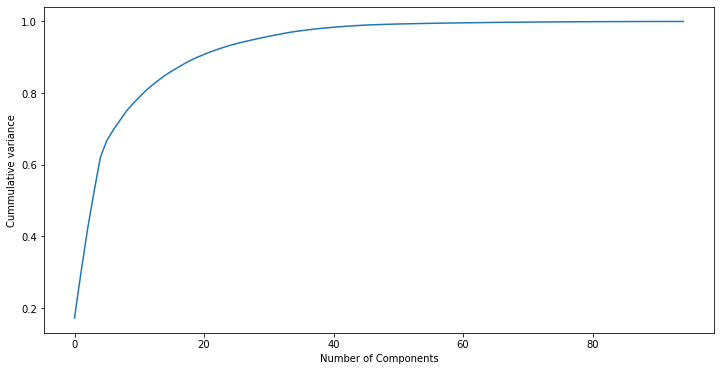

In [44]:
plt.figure(figsize = (12, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cummulative variance')
plt.show()

## Observation :-

**Based on the plot above it's clear we should pick 42 features.**


In [45]:
## Number of components = 42
pca = PCA(n_components=42,whiten=True)
X_PCA = pca.fit_transform(X)

In [46]:
X_PCA

array([[-1.32184844,  0.0805435 ,  0.13034847, ...,  0.07623052,
        -0.23583281, -0.21459147],
       [ 0.14191915, -0.60993306,  0.17576669, ..., -0.51446771,
        -0.23778903,  0.21368024],
       [ 0.13880642,  0.74367826, -0.06938524, ...,  0.26637384,
         0.01876542, -0.25639503],
       ...,
       [ 0.14446594, -1.32453457,  0.31385217, ...,  0.1862097 ,
        -0.00478236,  0.06607875],
       [-1.74087891,  0.6839305 ,  0.02648179, ...,  0.01630606,
        -0.12221382, -0.15916361],
       [ 0.85528542, -0.72330209,  1.41193187, ...,  0.10514567,
         0.32586629, -0.07317705]])

## Train Test Split on the best features :

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X_PCA[:], Y, test_size=.30, random_state=25)

## A. Logistic Regression with PCA :

In [48]:
logist = LogisticRegression(max_iter = 250)
logist.fit(x_train,y_train)
##Predicting the test data
y_predict_logistic = logist.predict(x_test)

In [49]:
print('Accuracy score : {}'.format(accuracy_score(y_test,y_predict_logistic)))
print('\n')
print('Confusion matrix :')
print(confusion_matrix(y_test,y_predict_logistic))
print('\n')
print('Classification Report :')
print(classification_report(y_test,y_predict_logistic))

Accuracy score : 0.8502985184639198


Confusion matrix :
[[9497  663]
 [1368 2039]]


Classification Report :
              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     10160
         1.0       0.75      0.60      0.67      3407

    accuracy                           0.85     13567
   macro avg       0.81      0.77      0.79     13567
weighted avg       0.84      0.85      0.84     13567



## B. Support Vector Machine with PCA :

In [50]:
svm = svm.SVC()
svm.fit(x_train,y_train)
##Predicting the test data
y_predict_svm = svm.predict(x_test)

In [51]:
print('Accuracy score : {}'.format(accuracy_score(y_test,y_predict_svm)))
print('\n')
print('Confusion matrix :')
print(confusion_matrix(y_test,y_predict_svm))
print('\n')
print('Classification Report :')
print(classification_report(y_test,y_predict_svm))

Accuracy score : 0.8501511019385273


Confusion matrix :
[[9522  638]
 [1395 2012]]


Classification Report :
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     10160
         1.0       0.76      0.59      0.66      3407

    accuracy                           0.85     13567
   macro avg       0.82      0.76      0.78     13567
weighted avg       0.84      0.85      0.84     13567



## C. KNeighborsClassifier with PCA :

In [52]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
##Predicting the test data
y_predict_knn = knn.predict(x_test)

In [53]:
print('Accuracy score : {}'.format(accuracy_score(y_test,y_predict_knn)))
print('\n')
print('Confusion matrix :')
print(confusion_matrix(y_test,y_predict_knn))
print('\n')
print('Classification Report :')
print(classification_report(y_test,y_predict_knn))

Accuracy score : 0.818309132453748


Confusion matrix :
[[9100 1060]
 [1405 2002]]


Classification Report :
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88     10160
         1.0       0.65      0.59      0.62      3407

    accuracy                           0.82     13567
   macro avg       0.76      0.74      0.75     13567
weighted avg       0.81      0.82      0.81     13567



## D. Decision Tree Classifier with PCA :

In [54]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
##Predicting the test data
y_predict_dtc = dtc.predict(x_test)

In [55]:
print('Accuracy score : {}'.format(accuracy_score(y_test,y_predict_dtc)))
print('\n')
print('Confusion matrix :')
print(confusion_matrix(y_test,y_predict_dtc))
print('\n')
print('Classification Report :')
print(classification_report(y_test,y_predict_dtc))

Accuracy score : 0.8015773568216997


Confusion matrix :
[[8902 1258]
 [1434 1973]]


Classification Report :
              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87     10160
         1.0       0.61      0.58      0.59      3407

    accuracy                           0.80     13567
   macro avg       0.74      0.73      0.73     13567
weighted avg       0.80      0.80      0.80     13567



## E. Random Forest Classifier with PCA :

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
## Prediction the test data
y_predict_rfc = rfc.predict(x_test)

In [57]:
print('Accuracy score : {}'.format(accuracy_score(y_test,y_predict_rfc)))
print('\n')
print('Confusion matrix :')
print(confusion_matrix(y_test,y_predict_rfc))
print('\n')
print('Classification Report :')
print(classification_report(y_test,y_predict_rfc))

Accuracy score : 0.841748359991155


Confusion matrix :
[[9353  807]
 [1340 2067]]


Classification Report :
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.90     10160
         1.0       0.72      0.61      0.66      3407

    accuracy                           0.84     13567
   macro avg       0.80      0.76      0.78     13567
weighted avg       0.84      0.84      0.84     13567



## Observation :-

1. We can conclude that for Logistic Regression have highest Accuracy Score i.e. 85.02 %. It fits are model best with PCA.

2. On the other hand SVM accuracy score is very much near to Logistic Regression i.e. 85.01 % (for SVM).

3. For RandomForestClassifier the accuracy score is 84.13 %.

4. For KNeighborsClassifier the accuracy score is 81.59 %.

## We can also use KFold by spliting the data into 4 part and applying each part in model.
1. KFold : Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default). It generally results in a less biased model compare to other methods.
2. cross_val_score : Returns score of each test folds.

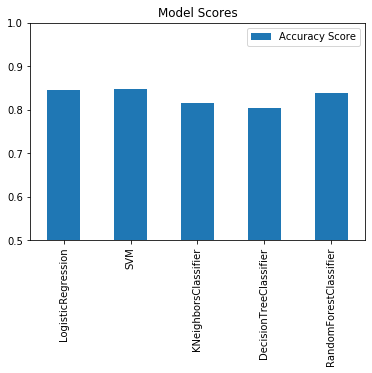

,Accuracy Score
LogisticRegression,0.846513
SVM,0.847928
KNeighborsClassifier,0.814803
DecisionTreeClassifier,0.803945
RandomForestClassifier,0.838486


In [58]:
from sklearn import svm
def lets_try(train,labels):
    results={}
    
    def test_model(model):
        cv = KFold(n_splits=5,shuffle=True,random_state=15)
        predicted = cross_val_score(model, train, Y, cv=cv)
        scores=[predicted.mean()]
        return scores
    
    model = LogisticRegression()
    results["LogisticRegression"]=test_model(model)
    
    model = svm.SVC()
    results["SVM"]=test_model(model)
    
    model = KNeighborsClassifier(n_neighbors=3)
    results['KNeighborsClassifier']=test_model(model)
    
    model = DecisionTreeClassifier()
    results["DecisionTreeClassifier"]=test_model(model)
    
    model = RandomForestClassifier()
    results["RandomForestClassifier"]=test_model(model)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["Accuracy Score"]
    
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0.5,1])
    plt.show()
    
    return results

lets_try(X_PCA[:],Y)